# Discriminant Analysis Using Decision Trees on Churn Modeling Dataset

### 2020661 Kaan Akkartal

# 1. Library and Data Loading

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
churn = pd.read_csv("Churn_Modelling.csv", skiprows=1, header = None, names = ["RowNumber", "CustomerID", "Surname", 
                                                      "CreditScore", "Geography", "Gender", "Age", "Tenure", 
                                                      "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", 
                                                      "EstimatedSalary", "Exited"])
df = churn.copy()
df.head()

,RowNumber,CustomerID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns=["RowNumber"], inplace = True)

In [4]:
df.head()

,CustomerID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Libraries are loaded. Data is added and RowNumber column is deleted. 

# 2. Descriptive Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,CustomerID,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The dataset has ten variables. Dtypes of categorical features will be adjusted. 

## 2.1. Missing Value Analysis

In [7]:
df.isnull().sum()

CustomerID         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values.

## 2.2 Data Visualization

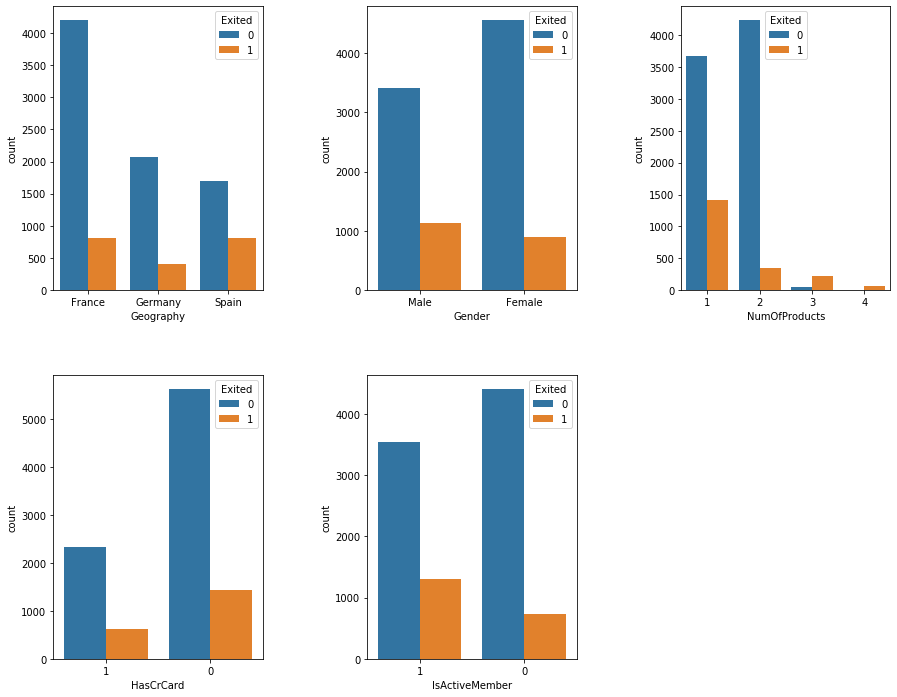

In [8]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.3)


plt.subplot(2,3,1)
sns.countplot(x = "Geography", data = df, hue = "Exited").set_xticklabels(labels = df.Geography.value_counts().index)
                                                                              

plt.subplot(2,3,2)
sns.countplot(x = "Gender", data = df, hue = "Exited").set_xticklabels(labels = df.Gender.value_counts().index)
                                                                               
plt.subplot(2,3,3)
sns.countplot(x = "NumOfProducts", data = df, hue = "Exited").set_xticklabels(labels = df.NumOfProducts.value_counts().index) 
                                                                               

plt.subplot(2,3,4)
sns.countplot(x = "HasCrCard", data = df, hue = "Exited").set_xticklabels(labels = df.HasCrCard.value_counts().index)
                                                                              

plt.subplot(2,3,5)
sns.countplot(x = "IsActiveMember", data = df, hue = "Exited").set_xticklabels(labels = df.IsActiveMember.value_counts().index);



It seems there are few Exited = "1" customers in the dataset. Customers that buy one product are likely to exit as compared to customers that buy more than one product. 

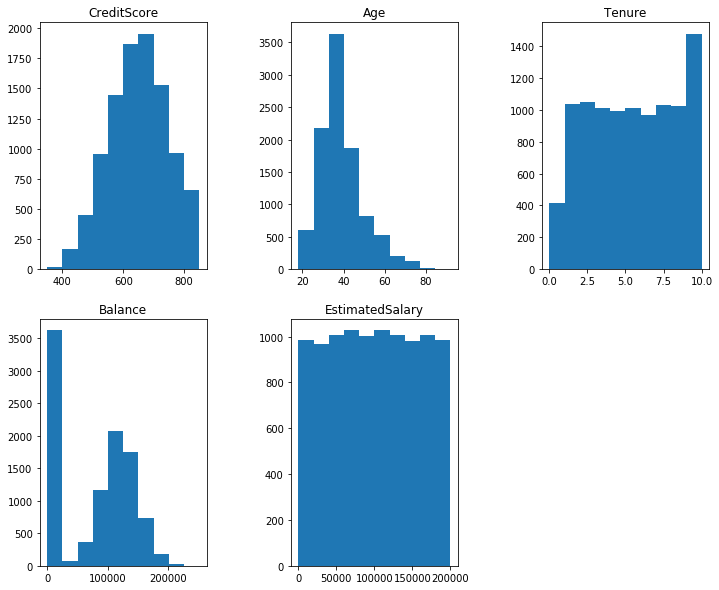

In [10]:
plt.figure(figsize = (12,10))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(2,3,1)
plt.hist(df.CreditScore)
plt.title("CreditScore")

plt.subplot(2,3,2)
plt.hist(df.Age)
plt.title("Age")

plt.subplot(2,3,3)
plt.hist(df.Tenure)
plt.title("Tenure")

plt.subplot(2,3,4)
plt.hist(df.Balance)
plt.title("Balance")

plt.subplot(2,3,5)
plt.hist(df.EstimatedSalary)
plt.title("EstimatedSalary");

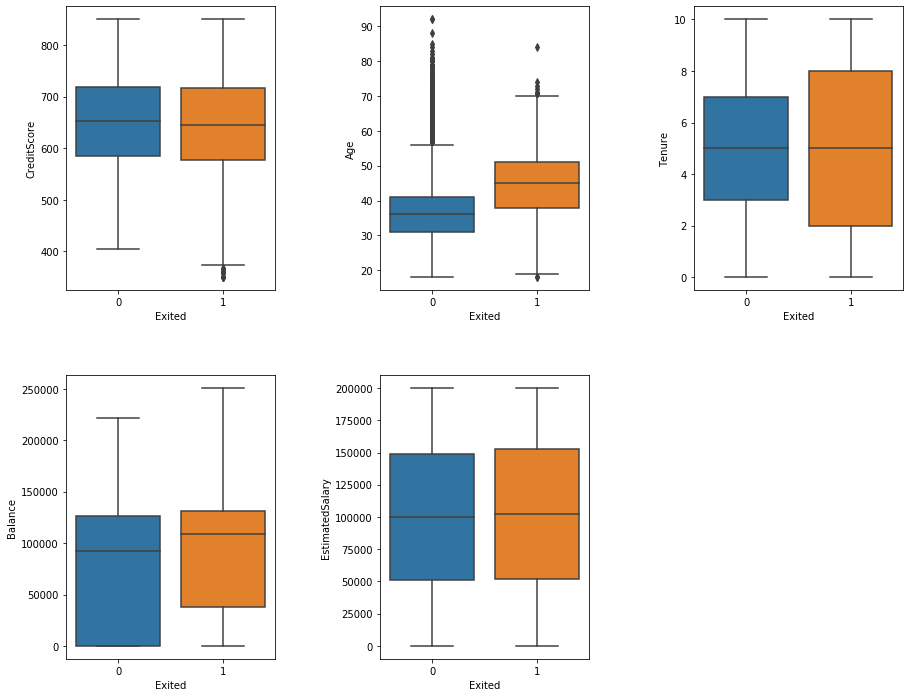

In [11]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.3)

plt.subplot(2,3,1)
sns.boxplot(x = "Exited", y = "CreditScore", data = df)

plt.subplot(2,3,2)
sns.boxplot(x = "Exited", y = "Age", data = df)

plt.subplot(2,3,3)
sns.boxplot(x = "Exited", y = "Tenure", data = df)

plt.subplot(2,3,4)
sns.boxplot(x = "Exited", y = "Balance", data = df)

plt.subplot(2,3,5)
sns.boxplot(x = "Exited", y = "EstimatedSalary", data = df);

In the Age - Exited boxplot, the median of not exited customers are less than exited customers, which indicates that younger customers are more likely to stay. However they have outlier observations more than the age of 55.  

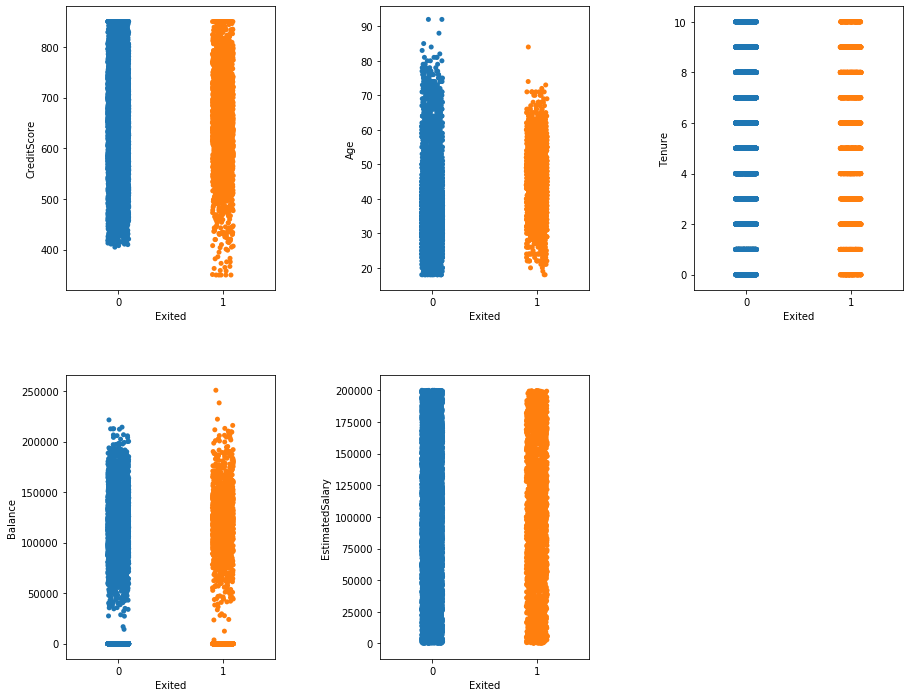

In [12]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.3)

plt.subplot(2,3,1)
sns.stripplot(x = "Exited", y = "CreditScore", data = df)

plt.subplot(2,3,2)
sns.stripplot(x = "Exited", y = "Age", data = df)

plt.subplot(2,3,3)
sns.stripplot(x = "Exited", y = "Tenure", data = df)

plt.subplot(2,3,4)
sns.stripplot(x = "Exited", y = "Balance", data = df)

plt.subplot(2,3,5)
sns.stripplot(x = "Exited", y = "EstimatedSalary", data = df);

Since there are few observaions in exited customers. It is hard to make a comment by looking to stripplots.

## 2.3. Correlation

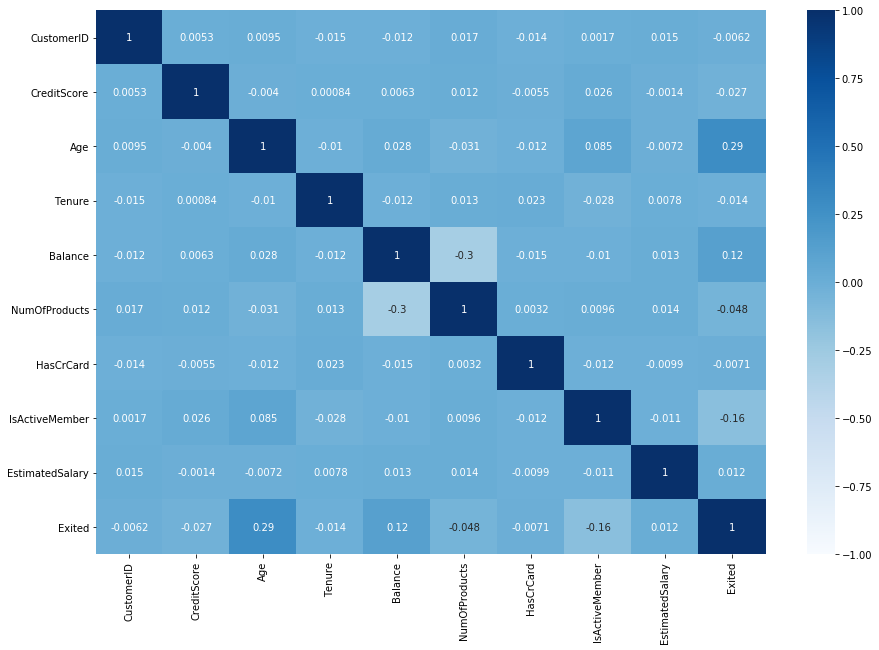

In [13]:
plt.figure(figsize = (15,10)) 
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = "Blues" );

Correlations between the variables are so small. There is a good correlation between Age and Exited which support the comment above in boxplots.  

## 2.4. Data Preparation 

In [14]:
df.dtypes

CustomerID           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
df.Geography = pd.Categorical(df.Geography)
df.Gender = pd.Categorical(df.Gender)
df.HasCrCard = pd.Categorical(df.HasCrCard)
df.IsActiveMember = pd.Categorical(df.IsActiveMember)
df.Exited = pd.Categorical(df.Exited)
df.dtypes

CustomerID            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

The type of the categorical variables are adjusted. 

In [17]:
X = df.drop(columns = ["CustomerID","Surname","Exited"])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [18]:
Y = df.Exited 
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: category
Categories (2, int64): [0, 1]

In [19]:
X = pd.get_dummies(X, drop_first = True)

In [20]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1


In [21]:
Y = pd.get_dummies(Y, drop_first = True)
Y.head()

,1
0,1
1,0
2,1
3,0
4,0


Exited --> 1

Not exited --> 0

Independent and dependent variables are set to X and Y. After that encoding is applied. 

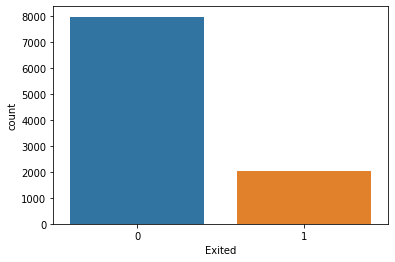

In [22]:
sns.countplot(x = "Exited", data = df);

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.40)

Since there are few observations in exited customers, test size is set as 40% of total dataset. 

# 3. Modelling - Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, Y_train)

In [25]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
y_pred = cart_model.predict(X_test)

In [28]:
accuracy_score(Y_test, y_pred)

0.7855

In [50]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      3187
           1       0.48      0.54      0.50       813

    accuracy                           0.79      4000
   macro avg       0.68      0.69      0.68      4000
weighted avg       0.80      0.79      0.79      4000



Accuracy score is 0.7855 but f1-score for predicting exited customers "1" seems not so strong which is 0.50. 

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(cart_model, X_test, Y_test, cv = 10).mean()

0.78975

In [31]:
cross_val_score(cart_model, X_train, Y_train, cv = 10).mean()

0.7955

Cross validation score of testing and training datasets look close to the first computed accuracy score.

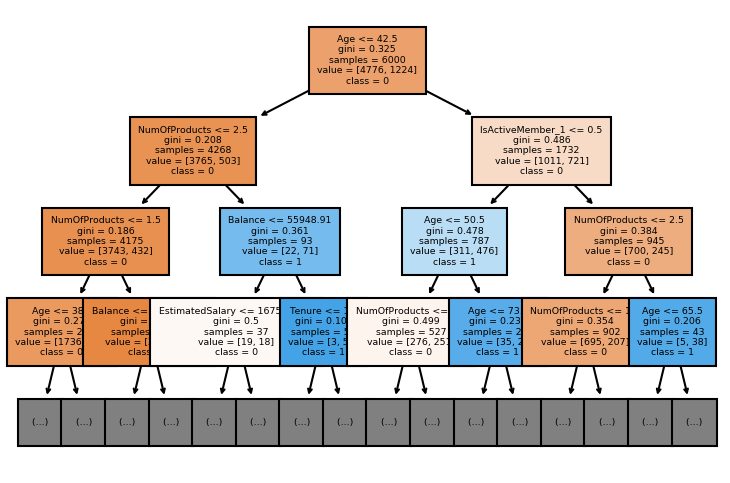

In [47]:
from sklearn import tree
plt.figure(dpi = 150)
tree.plot_tree(cart_model , feature_names = X.columns, class_names=["0", "1"], ax = plt.gca(),  filled=True, max_depth=3,
              fontsize = 4.5);

Since the depth number is high, only three of them is showed for observation. In the root node (Age <= 42,5) there are more stayed customers.